# Part I: Descriptive Statistics

## Import Libraries 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

## Import and Filter Data

In [2]:
df=pd.read_csv('Capstone_2_normalised_data.csv')
#df.head()
df=df.drop(['id', 'url', 'region_url', 'image_url'], axis=1)
df.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca


In [3]:
df_ca=df[df.state=='ca']
df_ca.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca


In [4]:
df_ca1=df_ca[df_ca['region']=='stockton']
df_ca1.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
6024,stockton,1999,house,1700,3,2.0,1,1,1,0,0,0,NaN,NaN,3 bedroom house in Lodi! No evictions in past ...,38.1551,-121.309,ca
7304,stockton,1900,house,1400,3,2.0,1,1,1,0,0,0,NaN,NaN,3 bedroom house in Stockton! No evictions in p...,38.0024,-121.324,ca


In [5]:
df_ca1['description_count'] = df_ca1.description.apply(lambda x: len(x.split()))
df_ca1.head(2)

C:\Users\npana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state,description_count
6024,stockton,1999,house,1700,3,2.0,1,1,1,0,0,0,NaN,NaN,3 bedroom house in Lodi! No evictions in past ...,38.1551,-121.309,ca,79
7304,stockton,1900,house,1400,3,2.0,1,1,1,0,0,0,NaN,NaN,3 bedroom house in Stockton! No evictions in p...,38.0024,-121.324,ca,81


## Data Cleaning

In [6]:
df_ca1.isnull().sum()

region                       0
price                        0
type                         0
sqfeet                       0
beds                         0
baths                        0
cats_allowed                 0
dogs_allowed                 0
smoking_allowed              0
wheelchair_access            0
electric_vehicle_charge      0
comes_furnished              0
laundry_options            444
parking_options            814
description                  0
lat                          2
long                         2
state                        0
description_count            0
dtype: int64

In [7]:
df_ca1.groupby('type')['laundry_options'].value_counts()

type          laundry_options   
apartment     w/d in unit           674
              laundry on site       665
              w/d hookups           546
              laundry in bldg       103
              no laundry on site     12
condo         w/d hookups             4
              laundry on site         3
              laundry in bldg         1
              w/d in unit             1
duplex        w/d hookups             8
              w/d in unit             2
              no laundry on site      1
flat          w/d hookups             3
house         w/d hookups            38
              w/d in unit            33
              laundry in bldg         3
              laundry on site         2
              no laundry on site      1
in-law        no laundry on site      1
              w/d in unit             1
manufactured  laundry on site         1
              w/d hookups             1
townhouse     w/d hookups            16
              w/d in unit             6
       

In [8]:
df_ca1['laundry_options'].value_counts(dropna=False)

w/d in unit           717
laundry on site       671
w/d hookups           616
NaN                   444
laundry in bldg       108
no laundry on site     15
Name: laundry_options, dtype: int64

In [9]:
df_ca1['laundry_options'].fillna('w/d in unit')

6024          w/d in unit
7304          w/d in unit
7841          w/d hookups
9011          w/d hookups
9024      laundry in bldg
               ...       
12113         w/d hookups
379374        w/d in unit
379402    laundry on site
381173        w/d in unit
381631        w/d in unit
Name: laundry_options, Length: 2571, dtype: object

In [10]:
df_ca1.groupby('type')['parking_options'].value_counts()

type          parking_options   
apartment     carport               1376
              attached garage        117
              off-street parking      83
              detached garage         38
              street parking           7
              no parking               2
condo         carport                  6
              detached garage          2
              attached garage          1
duplex        attached garage          6
              carport                  3
              detached garage          2
              street parking           1
flat          carport                  3
house         attached garage         66
              off-street parking       8
              street parking           5
              carport                  2
              detached garage          2
in-law        street parking           2
manufactured  off-street parking       2
townhouse     carport                 15
              attached garage          5
              detached g

In [11]:
df_ca1['parking_options'].value_counts(dropna=False)

carport               1405
NaN                    814
attached garage        195
off-street parking      93
detached garage         47
street parking          15
no parking               2
Name: parking_options, dtype: int64

In [12]:
df_ca1['parking_options'].fillna('carport')

6024                 carport
7304                 carport
7841         attached garage
9011         attached garage
9024      off-street parking
                 ...        
12113        detached garage
379374               carport
379402               carport
381173               carport
381631               carport
Name: parking_options, Length: 2571, dtype: object

In [13]:
df_ca1.shape

(2571, 19)

## Removing Oultliers

In [14]:
Q1 = df_ca1.quantile(0.25)
Q3 = df_ca1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                      490.000
sqfeet                     325.000
beds                         1.000
baths                        1.000
cats_allowed                 1.000
dogs_allowed                 1.000
smoking_allowed              0.000
wheelchair_access            0.000
electric_vehicle_charge      0.000
comes_furnished              0.000
lat                          0.194
long                         0.083
description_count           73.000
dtype: float64


In [15]:
outliers=(df_ca1 < (Q1 - 1.5 * IQR)) |(df_ca1 > (Q3 + 1.5 * IQR)) 
df_valid= df_ca1[~((df_ca1 < (Q1 - 1.5 * IQR)) |(df_ca1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_valid.shape

(1831, 19)

In [16]:
df_valid.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state,description_count
7304,stockton,1900,house,1400,3,2.0,1,1,1,0,0,0,NaN,NaN,3 bedroom house in Stockton! No evictions in p...,38.0024,-121.324,ca,81
7841,stockton,1600,house,1175,3,2.0,0,0,1,0,0,0,w/d hookups,attached garage,- Large Lot: 6600 SF - Granite Counter Top - C...,38.0314,-121.322,ca,85


In [17]:
df_valid.to_excel('df_valid.xlsx')

## Data Normalization

In [18]:

df_ca_V=df_valid[df_valid.region.isin(['stockton'])]
X_data=df_ca_V[['price','sqfeet', 'description_count']]
X_data2=X_data.apply(lambda x: (x - x.min(axis=0)) / ((x.max(axis=0))-(x.min(axis=0))))
X_data2.head(2)

,price,sqfeet,description_count
7304,0.724554,0.909570,0.267148
7841,0.552041,0.712028,0.281588


In [19]:
X_data2.shape

(1831, 3)

In [20]:
df_filt=df_valid.drop([ 'sqfeet','description_count', 'price' ], axis=1)

In [21]:
df_normalised=pd.concat([df_filt, X_data2], axis=1)
df_normalised.head(2)

,region,type,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state,price,sqfeet,description_count
7304,stockton,house,3,2.0,1,1,1,0,0,0,NaN,NaN,3 bedroom house in Stockton! No evictions in p...,38.0024,-121.324,ca,0.724554,0.909570,0.267148
7841,stockton,house,3,2.0,0,0,1,0,0,0,w/d hookups,attached garage,- Large Lot: 6600 SF - Granite Counter Top - C...,38.0314,-121.322,ca,0.552041,0.712028,0.281588


In [22]:
df_normalised.shape

(1831, 19)

In [23]:
df_normalised.describe()

,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,price,sqfeet,description_count
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.0,1831.0,1831.0,1831.0,1830.000000,1830.000000,1831.000000,1831.000000,1831.000000
mean,1.673403,1.342163,0.678864,0.679956,1.0,0.0,0.0,0.0,37.974086,-121.322076,0.474256,0.448676,0.493291
std,0.617015,0.484111,0.467040,0.466620,0.0,0.0,0.0,0.0,0.116324,0.060511,0.169870,0.182841,0.191269
min,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,37.698800,-121.482000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,37.987200,-121.360000,0.359402,0.296752,0.382671
50%,2.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,38.002500,-121.324000,0.434158,0.457419,0.440433
75%,2.000000,2.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,38.037100,-121.278000,0.600920,0.568042,0.613718
max,3.000000,2.500000,1.000000,1.000000,1.0,0.0,0.0,0.0,38.200400,-121.188000,1.000000,1.000000,1.000000


## Insights

In [24]:
df_filt2=df_normalised[['price', 'sqfeet', 'beds', 'baths', 'description_count']]
df_filt2.head()

,price,sqfeet,beds,baths,description_count
7304,0.724554,0.909570,3,2.0,0.267148
7841,0.552041,0.712028,3,2.0,0.281588
9011,0.552041,0.712028,3,2.0,0.281588
9039,0.645198,0.518876,2,2.0,0.963899
9097,0.000000,0.482880,2,1.0,0.173285


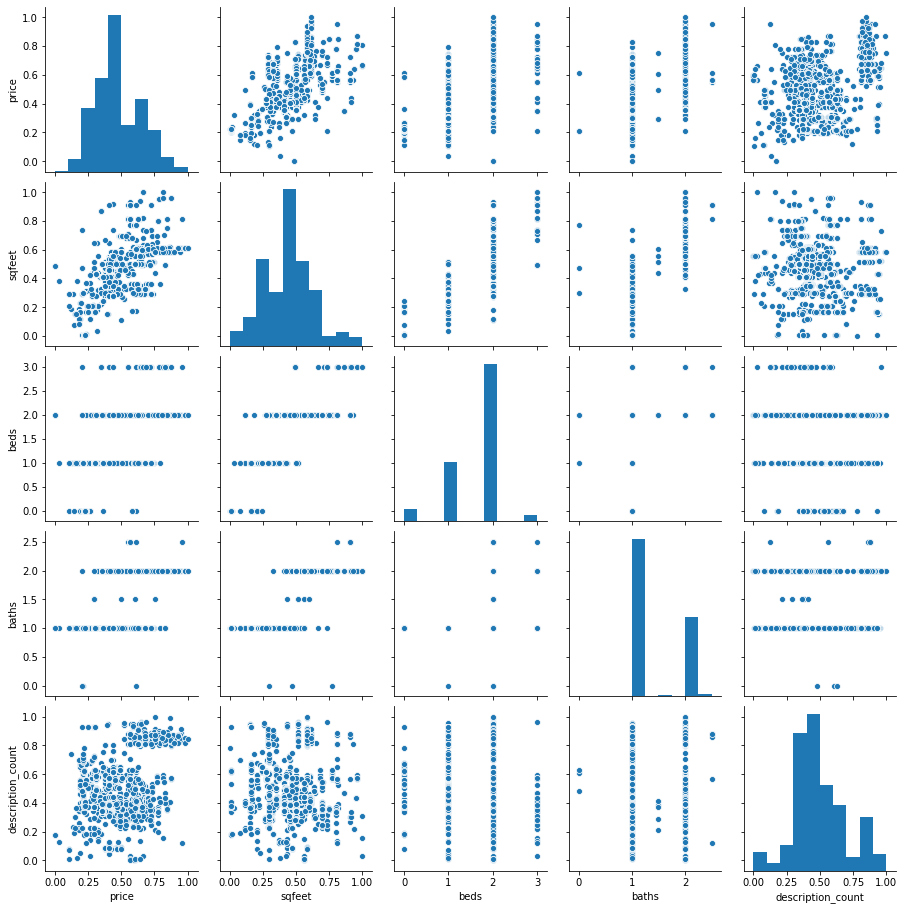

In [25]:
g=sns.pairplot(df_filt2)

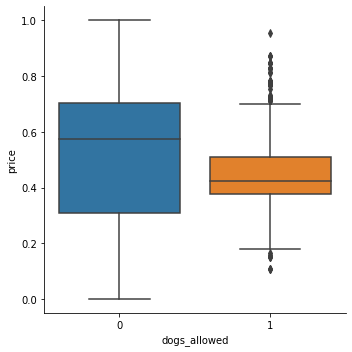

In [26]:
sns.catplot(x="dogs_allowed", y="price", kind="box", data=df_normalised)

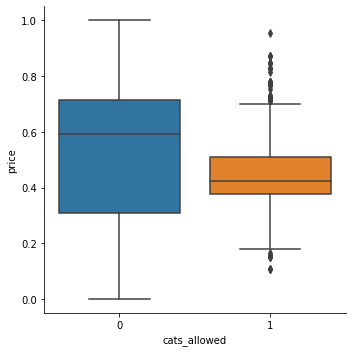

In [27]:
sns.catplot(x="cats_allowed", y="price", kind="box", data=df_normalised)

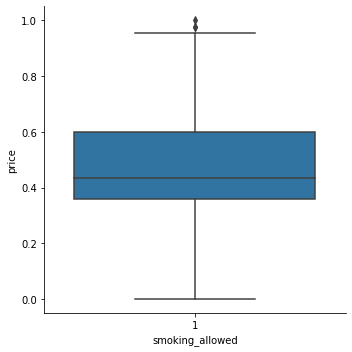

In [28]:
sns.catplot(x="smoking_allowed", y="price", kind="box", data=df_normalised)

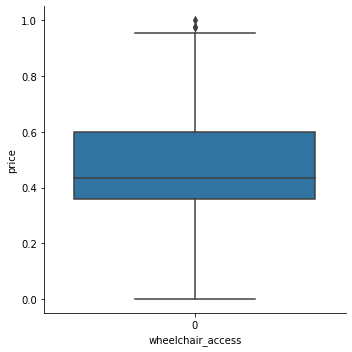

In [29]:
sns.catplot(x="wheelchair_access", y="price", kind="box", data=df_normalised)

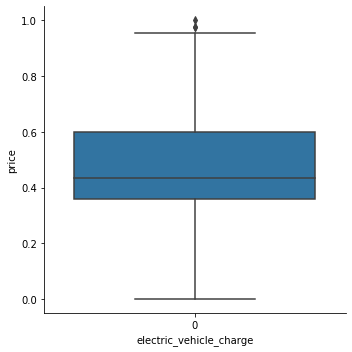

In [30]:
sns.catplot(x="electric_vehicle_charge", y="price", kind="box", data=df_normalised)

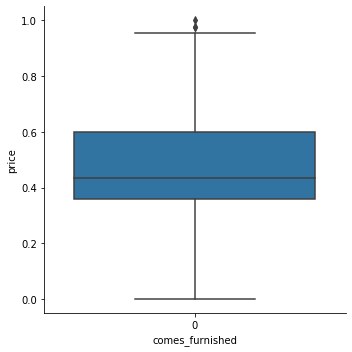

In [31]:
sns.catplot(x="comes_furnished", y="price", kind="box", data=df_normalised)

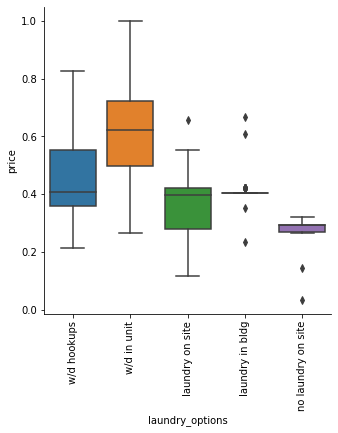

In [32]:
sns.catplot(x="laundry_options", y="price",kind="box", data=df_normalised)
plt.xticks(rotation=90)
plt.show()

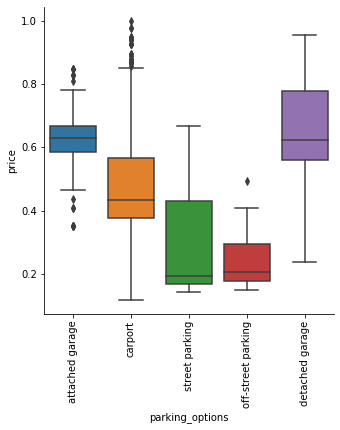

In [33]:
sns.catplot(x="parking_options", y="price",kind="box", data=df_normalised)
plt.xticks(rotation=90)
plt.show()

## Creating Dummy Variables

In [34]:
dataframe1=pd.get_dummies(df_normalised, columns=['laundry_options'], drop_first=False)
dataframe1.head(2)


,region,type,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,long,state,price,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit
7304,stockton,house,3,2.0,1,1,1,0,0,0,...,-121.324,ca,0.724554,0.909570,0.267148,0,0,0,0,0
7841,stockton,house,3,2.0,0,0,1,0,0,0,...,-121.322,ca,0.552041,0.712028,0.281588,0,0,0,1,0


In [35]:
df_valid2=pd.get_dummies(dataframe1, columns=['parking_options'], drop_first=False)
df_valid2.head(2)

,region,type,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_off-street parking,parking_options_street parking
7304,stockton,house,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7841,stockton,house,3,2.0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [36]:
df_valid2.shape

(1831, 27)

In [37]:
df_valid3=df_valid2.drop(['region', 'type', 'description','smoking_allowed',
                          'wheelchair_access', 'electric_vehicle_charge',
                          'comes_furnished','long', 'lat', 'state' ], axis=1)
df_valid3.head()

,beds,baths,cats_allowed,dogs_allowed,price,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_off-street parking,parking_options_street parking
7304,3,2.0,1,1,0.724554,0.909570,0.267148,0,0,0,0,0,0,0,0,0,0
7841,3,2.0,0,0,0.552041,0.712028,0.281588,0,0,0,1,0,1,0,0,0,0
9011,3,2.0,0,0,0.552041,0.712028,0.281588,0,0,0,1,0,1,0,0,0,0
9039,2,2.0,1,1,0.645198,0.518876,0.963899,0,0,0,1,0,0,1,0,0,0
9097,2,1.0,0,0,0.000000,0.482880,0.173285,0,0,0,0,0,0,0,0,0,0


## Part II: Inferential Statistical Analysis

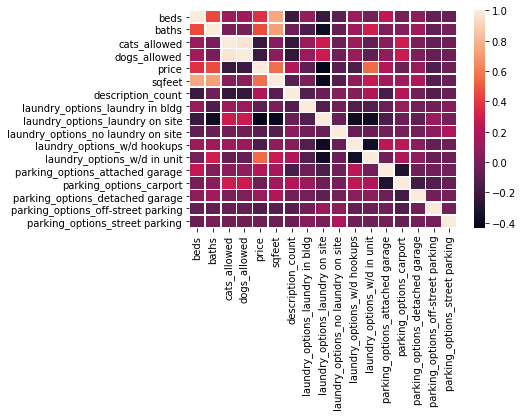

In [38]:
heatmap=sns.heatmap(df_valid3.corr(), linewidths=0.5 )
plt.show()

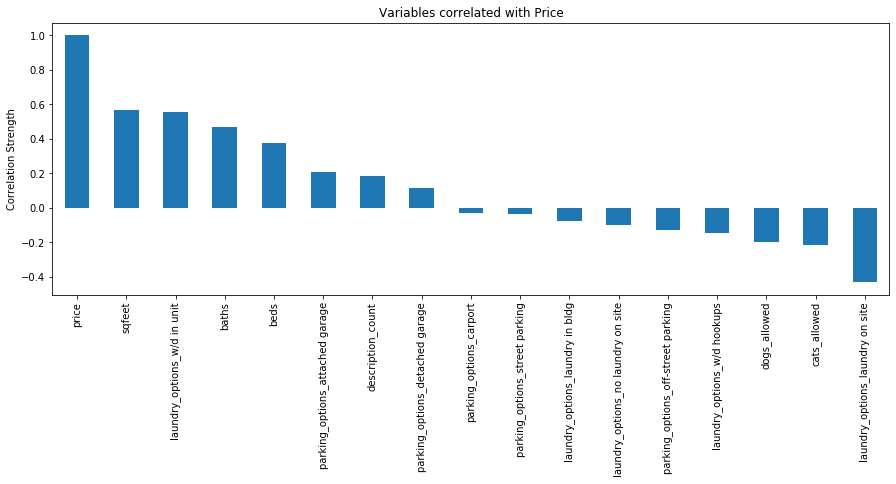

In [39]:
plt.rcParams['figure.figsize']=(15,5)
corr=df_valid3.corr()
corr = corr.sort_values("price", ascending=False)
#corr.plot(kind='bar')
corr['price'].plot(kind='bar')
plt.title("Variables correlated with Price")
plt.ylabel("Correlation Strength")
plt.show()

In [40]:
df_valid3.head()

,beds,baths,cats_allowed,dogs_allowed,price,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_off-street parking,parking_options_street parking
7304,3,2.0,1,1,0.724554,0.909570,0.267148,0,0,0,0,0,0,0,0,0,0
7841,3,2.0,0,0,0.552041,0.712028,0.281588,0,0,0,1,0,1,0,0,0,0
9011,3,2.0,0,0,0.552041,0.712028,0.281588,0,0,0,1,0,1,0,0,0,0
9039,2,2.0,1,1,0.645198,0.518876,0.963899,0,0,0,1,0,0,1,0,0,0
9097,2,1.0,0,0,0.000000,0.482880,0.173285,0,0,0,0,0,0,0,0,0,0


In [41]:
df_valid3.shape

(1831, 17)

In [42]:
columns=['beds','baths','cats_allowed', 'dogs_allowed',
         'sqfeet', 'description_count','laundry_options_laundry in bldg',
         'laundry_options_laundry on site','laundry_options_no laundry on site',
         'laundry_options_w/d hookups','laundry_options_w/d in unit',
         'parking_options_attached garage','parking_options_carport',
         'parking_options_detached garage',
         'parking_options_off-street parking','parking_options_street parking',
         'price']
df_reindex=df_valid3.reindex(columns=columns)
df_reindex.head()

,beds,baths,cats_allowed,dogs_allowed,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_off-street parking,parking_options_street parking,price
7304,3,2.0,1,1,0.909570,0.267148,0,0,0,0,0,0,0,0,0,0,0.724554
7841,3,2.0,0,0,0.712028,0.281588,0,0,0,1,0,1,0,0,0,0,0.552041
9011,3,2.0,0,0,0.712028,0.281588,0,0,0,1,0,1,0,0,0,0,0.552041
9039,2,2.0,1,1,0.518876,0.963899,0,0,0,1,0,0,1,0,0,0,0.645198
9097,2,1.0,0,0,0.482880,0.173285,0,0,0,0,0,0,0,0,0,0,0.000000


In [43]:
df_reindex.shape

(1831, 17)

In [44]:
y=df_reindex.iloc[:, -1]

In [45]:
x=df_reindex.iloc[:, 0:16]

In [46]:
x.head()

,beds,baths,cats_allowed,dogs_allowed,sqfeet,description_count,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_off-street parking,parking_options_street parking
7304,3,2.0,1,1,0.909570,0.267148,0,0,0,0,0,0,0,0,0,0
7841,3,2.0,0,0,0.712028,0.281588,0,0,0,1,0,1,0,0,0,0
9011,3,2.0,0,0,0.712028,0.281588,0,0,0,1,0,1,0,0,0,0
9039,2,2.0,1,1,0.518876,0.963899,0,0,0,1,0,0,1,0,0,0
9097,2,1.0,0,0,0.482880,0.173285,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
regressor.coef_

array([ 0.03988271,  0.02656104, -0.02838175, -0.00650625,  0.23696182,
        0.18729245, -0.06824844, -0.0899598 , -0.17393123, -0.10278844,
        0.08993073,  0.14834475, -0.0055505 ,  0.03355304, -0.09145015,
        0.02832488])

In [50]:
y_pred=regressor.predict(x_test)
y_pred[0]

0.6496260711085874

In [51]:
print(y_test)

10394    0.480161
11842    0.293272
9580     0.717654
9996     0.422657
11716    0.491662
           ...   
11037    0.376078
10488    0.212766
10001    0.491662
11237    0.480161
10838    0.296147
Name: price, Length: 367, dtype: float64


In [52]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print(score)

0.5160441215679589


In [53]:
# checking accuracy using mean square error (MSE)
np.mean((y_pred-y_test)**2)

0.013235928303066677